# Exploratory Analysis for COVID19 [3 pts]

Inspired by the paper of [Brinati et al. (2020)](https://zenodo.org/record/3886927#.X7Jy_ZMzbm1), I produce an exploratory analysis attempting to detect COVID-19 (SWAB) based on features such as gender, age, blood exams, etc. 

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

matplotlib.style.use('seaborn-bright')

In [2]:
# Import libraries and data needed.

data = pd.read_excel('covid_study_v2.xlsx')

In [3]:
# Take a short overview of the data.

data.tail(4)

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
275,M,26,4.7,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0
276,F,44,15.7,356.0,NaN,NaN,NaN,NaN,NaN,2.4,31.0,17.0,NaN,NaN,272.0,0
277,F,41,12.0,321.0,6.7,2.3,1.6,1.3,0.1,41.2,16.0,11.0,201.0,14.0,266.0,0
278,M,53,17.9,272.0,14.1,2.1,1.5,0.2,0.1,123.9,13.0,10.0,NaN,NaN,258.0,0


In [4]:
# Sum the number of empty entries in each columns.

data_isna_sum = data.isna().sum()
data.isna().sum()

GENDER           0
AGE              0
WBC              2
Platelets        2
Neutrophils     70
Lymphocytes     70
Monocytes       70
Eosinophils     70
Basophils       71
CRP              6
AST              2
ALT             13
ALP            148
GGT            143
LDH             85
SWAB             0
dtype: int64

In [5]:
# Find the average empty entries in each columns.

data_isna_mean = data.isna().mean()
data.isna().mean()

GENDER         0.000000
AGE            0.000000
WBC            0.007168
Platelets      0.007168
Neutrophils    0.250896
Lymphocytes    0.250896
Monocytes      0.250896
Eosinophils    0.250896
Basophils      0.254480
CRP            0.021505
AST            0.007168
ALT            0.046595
ALP            0.530466
GGT            0.512545
LDH            0.304659
SWAB           0.000000
dtype: float64

In [6]:
# Find the count of features that have missing values.

print( "The count of features that have a mean greater than 0 is :", len(data.isna().mean()[data.isna().mean() > 0]))

The count of features that have a mean greater than 0 is : 13


In [7]:
# Import the data of Table 2 Features and missing values in the dataset published in the paper.

data_paper = pd.DataFrame([['CRP',6,2.1],
                            ['AST',2,0.7],
                            ['ALT',13,4.6],
                            ['GGT',143,51.2],
                            ['LDH',85,30.4],
                            ['WBC',2,0.7],
                            ['Platelets',2,0.7],
                            ['Neutrophils',70,25],
                            ['Lymphocytes',70,25],
                            ['Monocytes',70,25],
                            ['Eosinophils',70,25],
                            ['Basophils',71,25.4]],
                            columns=['Feature', 'N◦ of missing', '% of missing on the total'])
data_paper

,Feature,N◦ of missing,% of missing on the total
0,CRP,6,2.1
1,AST,2,0.7
2,ALT,13,4.6
3,GGT,143,51.2
4,LDH,85,30.4
5,WBC,2,0.7
6,Platelets,2,0.7
7,Neutrophils,70,25.0
8,Lymphocytes,70,25.0
9,Monocytes,70,25.0


In [8]:
# Check if the dataframes are equal.

data.equals(data_paper)

False

In [9]:
# Find the count of features included.

print( "The count of features included is :", len(data_paper))

The count of features included is : 12


I binarise the "GENDER" column (only 0s and 1s should be included). 


In [10]:
# Change in place the value gender from string to integer by settin 0 for male and 1 for female.

data.GENDER.replace(['M','F'],[0,1],inplace=True)

In [11]:
# Check a glimpse at the new dataset

data.head(3)

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
0,0,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,0,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,0,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1


In [12]:
len(data)

279

I detect and replace any non-empty yet invalid values in all the columns (e.g., a non-integer in a column of integers).

In [13]:
# Each column of the dataframe should be homogenous in itself, meaning it should include the same type of data
# First I check what type of data each columns has.

def check_columns_type(data):
    prototype="%-8s %-30s %s"
    print(prototype % ("Value type", "Column", "Example Value"))
    print("-"*55)
    print("-"*55)
    for c in data.columns:
        print(prototype % (data[c].dtype, c, data[c].iloc[1]) )
        
check_columns_type(data)

Value type Column                         Example Value
-------------------------------------------------------
-------------------------------------------------------
int64    GENDER                         0
int64    AGE                            56
float64  WBC                            3.5
float64  Platelets                      151.0
float64  Neutrophils                    2.1
object   Lymphocytes                    0.9
float64  Monocytes                      0.4
float64  Eosinophils                    0.0
float64  Basophils                      0.0
float64  CRP                            16.5
float64  AST                            25.0
float64  ALT                            14.0
float64  ALP                            50.0
float64  GGT                            17.0
float64  LDH                            207.0
int64    SWAB                           1


In [14]:
# I notice that the column Lymphocytes is of object type even though it should be float64.
# We tranform it to numeric.

data['Lymphocytes'] = pd.to_numeric(data['Lymphocytes'],errors='coerce')

In [15]:
# I re-check so as to ensure that the data are in the correct format

# Each column of the dataframe should be homogenous in itself, meaning it should include the same type of data
# First I check what type of data each columns has.

def check_columns_type(data):
    prototype="%-8s %-30s %s"
    print(prototype % ("Value type", "Column", "Example Value"))
    print("-"*55)
    print("-"*55)
    for c in data.columns:
        print(prototype % (data[c].dtype, c, data[c].iloc[1]) )
        
check_columns_type(data)

Value type Column                         Example Value
-------------------------------------------------------
-------------------------------------------------------
int64    GENDER                         0
int64    AGE                            56
float64  WBC                            3.5
float64  Platelets                      151.0
float64  Neutrophils                    2.1
float64  Lymphocytes                    0.9
float64  Monocytes                      0.4
float64  Eosinophils                    0.0
float64  Basophils                      0.0
float64  CRP                            16.5
float64  AST                            25.0
float64  ALT                            14.0
float64  ALP                            50.0
float64  GGT                            17.0
float64  LDH                            207.0
int64    SWAB                           1


* I plot a correlation heatmap

In [16]:
data.corr()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
GENDER,1.000000,-0.035894,-0.035889,0.065346,-0.081779,0.205303,0.030198,0.069672,0.027425,-0.278734,-0.143065,-0.112718,0.121753,-0.067119,-0.121422,-0.249735
AGE,-0.035894,1.000000,0.102588,-0.169922,0.120493,-0.267311,0.033564,-0.111213,-0.074366,0.112145,-0.000950,-0.072027,0.005807,-0.024308,0.233535,0.087642
WBC,-0.035889,0.102588,1.000000,0.410903,0.949853,0.154576,0.571743,0.170262,0.501879,0.257293,0.166680,0.070221,0.133253,0.087659,0.359851,-0.195186
Platelets,0.065346,-0.169922,0.410903,1.000000,0.303087,0.168100,0.300559,0.237937,0.317986,0.083421,0.030870,0.145952,0.185051,0.236455,0.132384,-0.047264
Neutrophils,-0.081779,0.120493,0.949853,0.303087,1.000000,-0.075193,0.434948,0.060161,0.433769,0.352394,0.241553,0.124421,0.062913,0.091343,0.366790,-0.153678
Lymphocytes,0.205303,-0.267311,0.154576,0.168100,-0.075193,1.000000,0.305444,0.265283,0.253642,-0.324145,-0.168608,-0.130666,0.052114,-0.062801,-0.281676,-0.255215
Monocytes,0.030198,0.033564,0.571743,0.300559,0.434948,0.305444,1.000000,0.230279,0.367889,-0.066332,-0.074981,-0.017995,0.022926,-0.078333,-0.170563,-0.264875
Eosinophils,0.069672,-0.111213,0.170262,0.237937,0.060161,0.265283,0.230279,1.000000,0.424574,-0.038679,0.038946,0.022065,0.169621,0.022376,-0.118227,-0.213475
Basophils,0.027425,-0.074366,0.501879,0.317986,0.433769,0.253642,0.367889,0.424574,1.000000,0.014646,0.197643,0.168447,0.031252,0.062178,0.013464,-0.136228
CRP,-0.278734,0.112145,0.257293,0.083421,0.352394,-0.324145,-0.066332,-0.038679,0.014646,1.000000,0.288562,0.081042,-0.005511,0.093661,0.478846,0.226312


Text(0.5, 1.0, 'Correlation Heatmap')

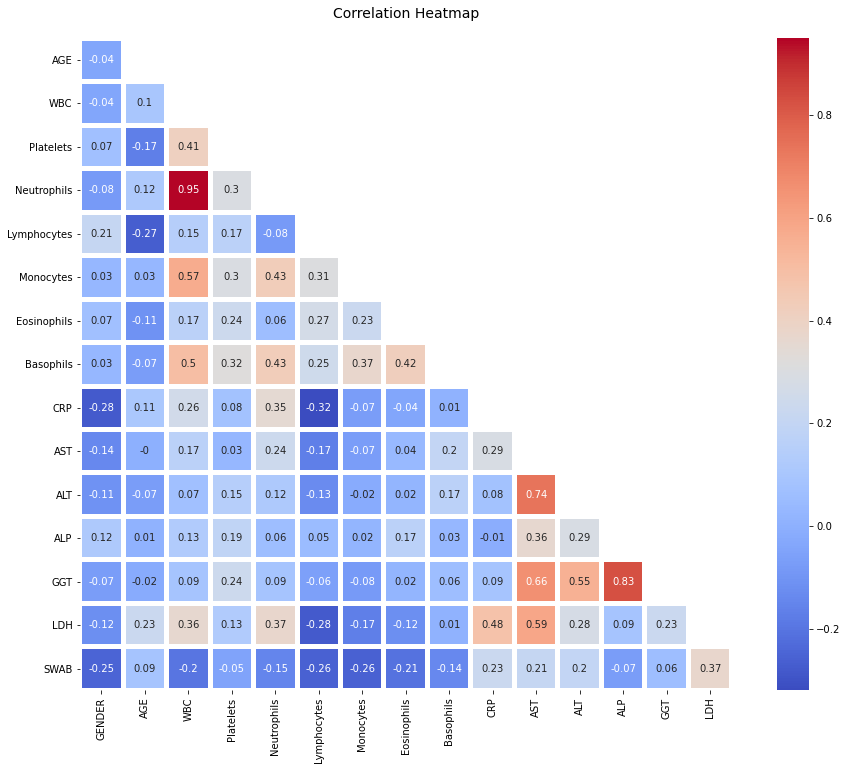

In [17]:
plt.figure(figsize=(16, 12)) # set the size of figure

# mask the one triangle of the map
# adjust mask to exclude the correlation of a value with its self
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))[1:, :-1] 



corr = round(data.corr(),2).iloc[1:,:-1].copy() # calculate correlation and exclude autocorrelaton

heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm',  
                      mask = mask, linewidths = 4, square = True) # store the heatmap as object in order to assign attributes

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=20) # add title



I fill in the empty cells per column, by using such a value that will not affect the variance of that column. 

In [18]:
# First I calculate the mean and variance per columns

print('The mean per column is:\n', data.mean())

The mean per column is:
 GENDER           0.326165
AGE             61.336918
WBC              8.553069
Platelets      226.532130
Neutrophils      6.200478
Lymphocytes      1.186538
Monocytes        0.605742
Eosinophils      0.055024
Basophils        0.014423
CRP             90.889011
AST             54.202166
ALT             44.917293
ALP             89.893130
GGT             82.477941
LDH            380.448454
SWAB             0.634409
dtype: float64


In [19]:
var_before_fill = data.var() # store the variance before filling the nan values

print('The variance per column is:\n', data.var())

The variance per column is:
 GENDER             0.220572
AGE              341.936438
WBC               23.574456
Platelets      10236.214218
Neutrophils       17.410432
Lymphocytes        0.650349
Monocytes          0.168140
Eosinophils        0.017487
Basophils          0.001530
CRP             8915.401864
AST             3319.234343
ALT             2070.544077
ALP             7937.003876
GGT            17609.955065
LDH            37629.606137
SWAB               0.232769
dtype: float64


---

In order to ensure that the variance remains the same I worked as following:

I calculate the second degree polynomial that gives a $x_{n+1}$ value, which once added to a x array of lenght n its variance remains the same: Given that Var and $\overline{x}$ is the variance and mean of the x array and $Var'$ and $\overline{x'}$ is the variance and mean of the x array once $x_{n+1}$ is appended we want that:

$$Var' = \frac{1}{n} \sum_{i=1}^{n+1} (x_i - \overline{x'})^2 = \frac{1}{n} \sum_{i=1}^{n+1} (x_i - \overline{x'})^2 = Var \,\,\,\,\,(1)$$

and

$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n} x_i \Rightarrow \sum_{i=1}^{n} x_i = n  \overline{x} \,\,\,\,\,(2)$$

---


---
Finally, once solving equation 1 and substituting $\overline{x'}$ with $\overline{x}$ we end up with this equation:

$$\big[\frac{1}{n} \sum_{i=1}^{n} \frac{1}{(n+1)^2} + \frac{n}{(n+1)^2}\big] x_{n+1}^2 + \frac{1}{n}\sum_{i=1}^{n}[\frac{2n\overline{x}}{(n+1)^2} - \frac{2 x_i}{n+1} -\frac{2n}{(n+1)^2}\overline{x}] x_{n+1} + \big[\frac{1}{n} \sum_{i=1}^{n} [x_i^2 + (\frac{n}{n+1}  \overline{x})^2 - 2 x_i \frac{n}{n+1}  \overline{x}]\\  + \frac{n}{(n+1)^2}\overline{x}^2)  - Var\big] = 0 $$

The calculation of the above equation is explained [here](supplement.pdf).

     
---

---
This is in the form $\alpha x_{n+1}^2+ \beta x_{n+1} + c = 0$ where $a = a_1 + a_2 $, $b = b_1  + b_2  + b_3 $ and $c = c_1 + c_2 +c_3 + c_4$.

*   $ a_1 = \color{black}{[\frac{1}{n} \sum_{i=1}^{n} \frac{1}{(n+1)^2}] }$
*  $a_2= \color{black}{\frac{n}{(n+1)^2}}$
*  $b_1 = \color{black}{\frac{2n\overline{x}}{(n+1)^2} - \frac{2 x_i}{n+1}}$
*  $b_2 = \frac{1}{n}[\sum_{i=1}^{n} b_1] x_{n+1} = \color{black}{\frac{1}{n}\sum_{i=1}^{n}[\frac{2n\overline{x}}{(n+1)^2} - \frac{2 x_i}{n+1}] }$
*  $b_3 = \color{black}{-\frac{2n}{(n+1)^2}\overline{x}}$
*  $c_1 = \color{black}{x_i^2 + (\frac{n}{n+1}  \overline{x})^2 - 2 x_i \frac{n}{n+1}  \overline{x}}$
*  $c_2 = \frac{1}{n}\sum_{i=1}^{n} c_1 =  \color{black}{\frac{1}{n}\sum_{i=1}^{n}[x_i^2 + (\frac{n}{n+1}  \overline{x})^2 - 2 x_i \frac{n}{n+1}  \overline{x} ]}$
*  $c_3 = \color{black}{\frac{n}{(n+1)^2}\overline{x}^2}$
*  $c_4 = \color{black}{-Var}$
 

     
---

In [20]:
# I declare the functions that will calculate the elements 
# which constitute the a, b and c factors of the 2nd degree polynomial

def f_a1(n):
    return 1 / ((n + 1)**2)

def f_a2(n):
    return n / ((n + 1)**2)

############################

def f_b1(n, x_bar, x_i):
    return (2 * n * x_bar) / ((n + 1)**2) - (2 * x_i) / (n + 1)

def f_b2(x, x_bar):
    total = 0
    for x_i in x:
        total += f_b1(len(x), x_bar, x_i)
    return total / float(len(x))

def f_b3(n, x_bar):
    return - ((2 * x_bar * n) / ((n + 1)**2))


############################

def f_c1(n, x_bar, x_i):
    return x_i**2  + ((n * x_bar) / (n + 1))**2   - ((2 * n * x_bar * x_i) / (n + 1))

def f_c2(x, x_bar):
    total = 0
    for x_i in x:
        total += f_c1(len(x), x_bar, x_i)
    return total / float(len(x))

def f_c3(n, x_bar):
    return (n * (x_bar**2)) / ((n + 1)**2)

def f_c4(x):
    return - np.var(x, ddof=1)

############################

# I prepare the input factors a, b and c to be inserted to the np.roots() function
# which calculates the two roots of a 2nd degree polynomial

def calc_coeff(x):
    n = float(len(x))
    x_bar = np.mean(x)
    a = f_a1(n) + f_a2(n)
    b = f_b2(x, x_bar) + f_b3(n, x_bar)
    c = f_c2(x, x_bar) + f_c3(n, x_bar) + f_c4(x) 
    return (a, b, c)  



In [21]:
# I declare the function to use the a,b,c inputs, calculate the value to be added and check the new variance

#epsilon = 1e-20 # I want to have the same variance to the 20th decimal point

def generate_variance_invariant_value(x): # x is the array, ie. the data of each column
    root = np.roots(calc_coeff(x))[0] # calculate the roots and store the possitive value
    #print('root is:', root) # debugging
    x_new = np.append(x, root) # append the root to the array
    #print('I created', len(x_new)) # debugging
    nvar = np.var(x_new, ddof=1) # calcute the variance of the new dataset
    #print('The new variance is:', nvar) # debugging
    #if math.fabs(nvar != np.var(x, ddof=1)) > epsilon: # check if the new variance is the same as the original
         #raise Exception("Variances differ! %f vs %f" % (nvar, np.var(x, ddof=1)))
    return root

In [22]:
# Sum the number of empty entries in each columns.

data_isna_sum = data.isna().sum()
data.isna().sum()

GENDER           0
AGE              0
WBC              2
Platelets        2
Neutrophils     70
Lymphocytes     71
Monocytes       70
Eosinophils     70
Basophils       71
CRP              6
AST              2
ALT             13
ALP            148
GGT            143
LDH             85
SWAB             0
dtype: int64

In [23]:
# For each columns I create a dataset with values that will fill the nan fields

In [24]:
# WBC

WBC = data['WBC'].to_numpy() # store the values to a numpy array
WBC_nan_free = data['WBC'].dropna().to_numpy() # create an array without the nan values
nan_count_WBC = len(WBC) - len(WBC_nan_free) # count the number of nan values

WBC_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_WBC): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(WBC_nan_free) # create a new value
    WBC_nan_free = np.append(WBC_nan_free,new_value) # append it to the new array to iterate again
    WBC_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [25]:
data_isna_sum = data.isna().sum()
data.isna().sum()

GENDER           0
AGE              0
WBC              2
Platelets        2
Neutrophils     70
Lymphocytes     71
Monocytes       70
Eosinophils     70
Basophils       71
CRP              6
AST              2
ALT             13
ALP            148
GGT            143
LDH             85
SWAB             0
dtype: int64

In [26]:
# The values should have the index of the nan field of the dataframe

index_nan_WBC = data.loc[pd.isna(data['WBC']), :].index # find the nan index
WBC_values_to_fill_nan_series = pd.Series(WBC_values_to_fill_nan, index=index_nan_WBC) # assign the index to the new data

In [27]:
# Platelets

Platelets = data['Platelets'].to_numpy() # store the values to a numpy array
Platelets_nan_free = data['Platelets'].dropna().to_numpy() # create an array without the nan values
nan_count_Platelets = len(Platelets) - len(Platelets_nan_free) # count the number of nan values

Platelets_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_Platelets): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(Platelets_nan_free) # create a new value
    Platelets_nan_free = np.append(Platelets_nan_free,new_value) # append it to the new array to iterate again
    Platelets_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [28]:
# The values should have the index of the nan field of the dataframe

index_nan_Platelets = data.loc[pd.isna(data['Platelets']), :].index # find the nan index
Platelets_values_to_fill_nan_series = pd.Series(Platelets_values_to_fill_nan, index=index_nan_Platelets) # assign the index to the new data

In [29]:
# Neutrophils

Neutrophils = data['Neutrophils'].to_numpy() # store the values to a numpy array
Neutrophils_nan_free = data['Neutrophils'].dropna().to_numpy() # create an array without the nan values
nan_count_Neutrophils = len(Neutrophils) - len(Neutrophils_nan_free) # count the number of nan values

Neutrophils_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_Neutrophils): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(Neutrophils_nan_free) # create a new value
    Neutrophils_nan_free = np.append(Neutrophils_nan_free,new_value) # append it to the new array to iterate again
    Neutrophils_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [30]:
# The values should have the index of the nan field of the dataframe

index_nan_Neutrophils = data.loc[pd.isna(data['Neutrophils']), :].index # find the nan index
Neutrophils_values_to_fill_nan_series = pd.Series(Neutrophils_values_to_fill_nan, index=index_nan_Neutrophils) # assign the index to the new data

In [31]:
# Lymphocytes

Lymphocytes = data['Lymphocytes'].to_numpy() # store the values to a numpy array
Lymphocytes_nan_free = data['Lymphocytes'].dropna().to_numpy() # create an array without the nan values
nan_count_Lymphocytes = len(Lymphocytes) - len(Lymphocytes_nan_free) # count the number of nan values

Lymphocytes_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_Lymphocytes): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(Lymphocytes_nan_free) # create a new value
    Lymphocytes_nan_free = np.append(Lymphocytes_nan_free,new_value) # append it to the new array to iterate again
    Lymphocytes_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [32]:
# The values should have the index of the nan field of the dataframe

index_nan_Lymphocytes = data.loc[pd.isna(data['Lymphocytes']), :].index # find the nan index
Lymphocytes_values_to_fill_nan_series = pd.Series(Lymphocytes_values_to_fill_nan, index=index_nan_Lymphocytes) # assign the index to the new data

In [33]:
# Monocytes

Monocytes = data['Monocytes'].to_numpy() # store the values to a numpy array
Monocytes_nan_free = data['Monocytes'].dropna().to_numpy() # create an array without the nan values
nan_count_Monocytes = len(Monocytes) - len(Monocytes_nan_free) # count the number of nan values

Monocytes_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_Monocytes): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(Monocytes_nan_free) # create a new value
    Monocytes_nan_free = np.append(Monocytes_nan_free,new_value) # append it to the new array to iterate again
    Monocytes_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [34]:
# The values should have the index of the nan field of the dataframe

index_nan_Monocytes = data.loc[pd.isna(data['Monocytes']), :].index # find the nan index
Monocytes_values_to_fill_nan_series = pd.Series(Monocytes_values_to_fill_nan, index=index_nan_Monocytes) # assign the index to the new data

In [35]:
# Eosinophils

Eosinophils = data['Eosinophils'].to_numpy() # store the values to a numpy array
Eosinophils_nan_free = data['Eosinophils'].dropna().to_numpy() # create an array without the nan values
nan_count_Eosinophils = len(Eosinophils) - len(Eosinophils_nan_free) # count the number of nan values

Eosinophils_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_Eosinophils): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(Eosinophils_nan_free) # create a new value
    Eosinophils_nan_free = np.append(Eosinophils_nan_free,new_value) # append it to the new array to iterate again
    Eosinophils_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [36]:
# The values should have the index of the nan field of the dataframe

index_nan_Eosinophils = data.loc[pd.isna(data['Eosinophils']), :].index # find the nan index
Eosinophils_values_to_fill_nan_series = pd.Series(Eosinophils_values_to_fill_nan, index=index_nan_Eosinophils) # assign the index to the new data

In [37]:
# Basophils

Basophils = data['Basophils'].to_numpy() # store the values to a numpy array
Basophils_nan_free = data['Basophils'].dropna().to_numpy() # create an array without the nan values
nan_count_Basophils = len(Basophils) - len(Basophils_nan_free) # count the number of nan values

Basophils_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_Basophils): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(Basophils_nan_free) # create a new value
    Basophils_nan_free = np.append(Basophils_nan_free,new_value) # append it to the new array to iterate again
    Basophils_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [38]:
# The values should have the index of the nan field of the dataframe

index_nan_Basophils = data.loc[pd.isna(data['Basophils']), :].index # find the nan index
Basophils_values_to_fill_nan_series = pd.Series(Basophils_values_to_fill_nan, index=index_nan_Basophils) # assign the index to the new data

In [39]:
# CRP

CRP = data['CRP'].to_numpy() # store the values to a numpy array
CRP_nan_free = data['CRP'].dropna().to_numpy() # create an array without the nan values
nan_count_CRP = len(CRP) - len(CRP_nan_free) # count the number of nan values

CRP_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_CRP): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(CRP_nan_free) # create a new value
    CRP_nan_free = np.append(CRP_nan_free,new_value) # append it to the new array to iterate again
    CRP_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [40]:
# The values should have the index of the nan field of the dataframe

index_nan_CRP = data.loc[pd.isna(data['CRP']), :].index # find the nan index
CRP_values_to_fill_nan_series = pd.Series(CRP_values_to_fill_nan, index=index_nan_CRP) # assign the index to the new data

In [41]:
# AST

AST = data['AST'].to_numpy() # store the values to a numpy array
AST_nan_free = data['AST'].dropna().to_numpy() # create an array without the nan values
nan_count_AST = len(AST) - len(AST_nan_free) # count the number of nan values

AST_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_AST): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(AST_nan_free) # create a new value
    AST_nan_free = np.append(AST_nan_free,new_value) # append it to the new array to iterate again
    AST_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [42]:
# The values should have the index of the nan field of the dataframe

index_nan_AST = data.loc[pd.isna(data['AST']), :].index # find the nan index
AST_values_to_fill_nan_series = pd.Series(AST_values_to_fill_nan, index=index_nan_AST) # assign the index to the new data

In [43]:
# ALT

ALT = data['ALT'].to_numpy() # store the values to a numpy array
ALT_nan_free = data['ALT'].dropna().to_numpy() # create an array without the nan values
nan_count_ALT = len(ALT) - len(ALT_nan_free) # count the number of nan values

ALT_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_ALT): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(ALT_nan_free) # create a new value
    ALT_nan_free = np.append(ALT_nan_free,new_value) # append it to the new array to iterate again
    ALT_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [44]:
# The values should have the index of the nan field of the dataframe

index_nan_ALT = data.loc[pd.isna(data['ALT']), :].index # find the nan index
ALT_values_to_fill_nan_series = pd.Series(ALT_values_to_fill_nan, index=index_nan_ALT) # assign the index to the new data

In [45]:
# ALP

ALP = data['ALP'].to_numpy() # store the values to a numpy array
ALP_nan_free = data['ALP'].dropna().to_numpy() # create an array without the nan values
nan_count_ALP = len(ALP) - len(ALP_nan_free) # count the number of nan values

ALP_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_ALP): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(ALP_nan_free) # create a new value
    ALP_nan_free = np.append(ALP_nan_free,new_value) # append it to the new array to iterate again
    ALP_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [46]:
# The values should have the index of the nan field of the dataframe

index_nan_ALP = data.loc[pd.isna(data['ALP']), :].index # find the nan index
ALP_values_to_fill_nan_series = pd.Series(ALP_values_to_fill_nan, index=index_nan_ALP) # assign the index to the new data

In [47]:
# GGT

GGT = data['GGT'].to_numpy() # store the values to a numpy array
GGT_nan_free = data['GGT'].dropna().to_numpy() # create an array without the nan values
nan_count_GGT = len(GGT) - len(GGT_nan_free) # count the number of nan values

GGT_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_GGT): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(GGT_nan_free) # create a new value
    GGT_nan_free = np.append(GGT_nan_free,new_value) # append it to the new array to iterate again
    GGT_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [48]:
# The values should have the index of the nan field of the dataframe

index_nan_GGT = data.loc[pd.isna(data['GGT']), :].index # find the nan index
GGT_values_to_fill_nan_series = pd.Series(GGT_values_to_fill_nan, index=index_nan_GGT) # assign the index to the new data

In [49]:
# LDH

LDH = data['LDH'].to_numpy() # store the values to a numpy array
LDH_nan_free = data['LDH'].dropna().to_numpy() # create an array without the nan values
nan_count_LDH = len(LDH) - len(LDH_nan_free) # count the number of nan values

LDH_values_to_fill_nan = [] # create the list to store the new values

for i in range(nan_count_LDH): # iterate so many times as the count of nan  values
    new_value = generate_variance_invariant_value(LDH_nan_free) # create a new value
    LDH_nan_free = np.append(LDH_nan_free,new_value) # append it to the new array to iterate again
    LDH_values_to_fill_nan.append(new_value) # return the values to be used for filling the nan val at the df cols

In [50]:
# The values should have the index of the nan field of the dataframe

index_nan_LDH = data.loc[pd.isna(data['LDH']), :].index # find the nan index
LDH_values_to_fill_nan_series = pd.Series(LDH_values_to_fill_nan, index=index_nan_LDH) # assign the index to the new data

In [51]:
# Store the data in a dictionary to use it as input for the fillnan function

data_fill_nan_values   =  {'WBC':  WBC_values_to_fill_nan_series, 
                           'Platelets':  Platelets_values_to_fill_nan_series, 
                           'Neutrophils':  Neutrophils_values_to_fill_nan_series,
                           'Lymphocytes':  Lymphocytes_values_to_fill_nan_series,
                           'Monocytes':  Monocytes_values_to_fill_nan_series,
                           'Eosinophils':  Eosinophils_values_to_fill_nan_series,
                           'Basophils':  Basophils_values_to_fill_nan_series,
                           'CRP':  CRP_values_to_fill_nan_series,
                           'AST':  AST_values_to_fill_nan_series,
                           'ALT':  ALT_values_to_fill_nan_series,
                           'ALP':  ALP_values_to_fill_nan_series,
                           'GGT':  GGT_values_to_fill_nan_series,
                           'LDH': LDH_values_to_fill_nan_series}

In [52]:
# Finally I perform the fill of the calculated values to the respective fields

data.fillna(value = data_fill_nan_values, inplace=True)

In [53]:
# Control the result. 
# Check againg the sum the number of empty entries in each columns.

data.isna().sum()

GENDER         0
AGE            0
WBC            0
Platelets      0
Neutrophils    0
Lymphocytes    0
Monocytes      0
Eosinophils    0
Basophils      0
CRP            0
AST            0
ALT            0
ALP            0
GGT            0
LDH            0
SWAB           0
dtype: int64

In [54]:
# Also check the variance

var_after_fill = data.var()

In [55]:
data.var()

GENDER             0.220572
AGE              341.936438
WBC               23.574456
Platelets      10236.214218
Neutrophils       17.410432
Lymphocytes        0.650349
Monocytes          0.168140
Eosinophils        0.017487
Basophils          0.001530
CRP             8915.401864
AST             3319.234343
ALT             2070.544077
ALP             7937.003876
GGT            17609.955065
LDH            37629.606137
SWAB               0.232769
dtype: float64

In [56]:
# Check if the variance remains the same

dec = 8
round(var_after_fill, dec) == round(var_before_fill, dec)

GENDER         True
AGE            True
WBC            True
Platelets      True
Neutrophils    True
Lymphocytes    True
Monocytes      True
Eosinophils    True
Basophils      True
CRP            True
AST            True
ALT            True
ALP            True
GGT            True
LDH            True
SWAB           True
dtype: bool

---

Indeed the variance remains the same to the $8^{th}$ decimal point.

---

I show a pairplot of "AGE", "WBC", "CRP", "AST" and "Lymphocytes", by visualising SWAB as hue.

In [57]:
part = data[['AGE','WBC','CRP','AST','Lymphocytes','SWAB']].copy()

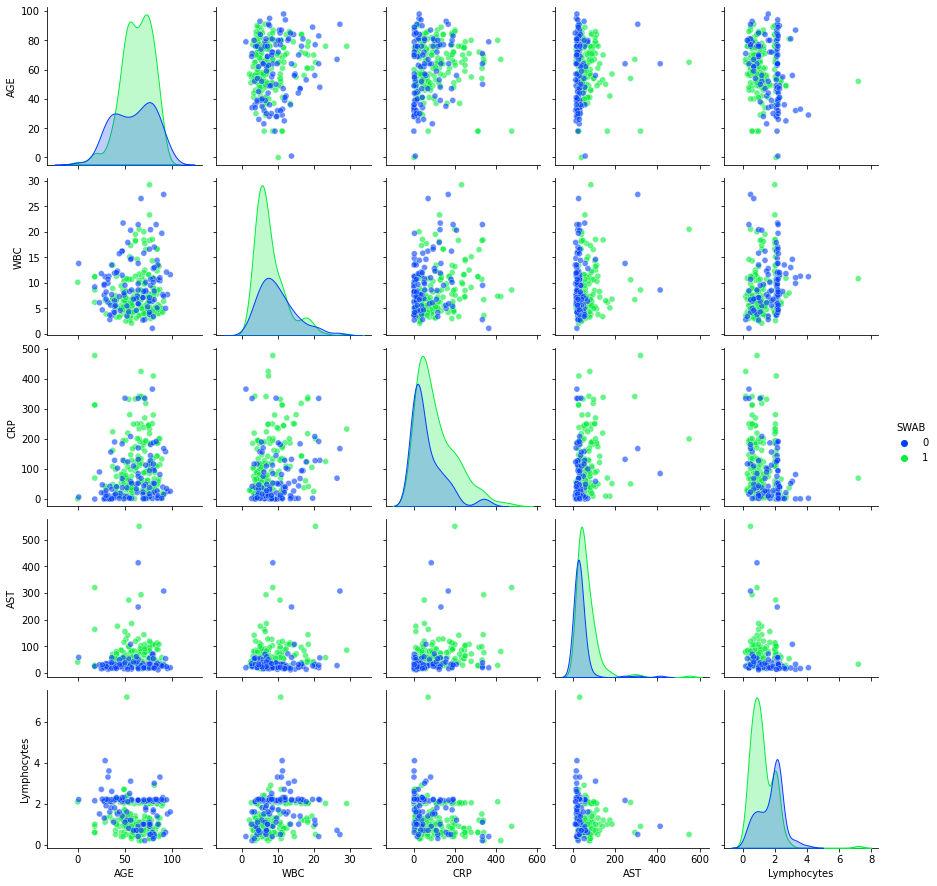

In [58]:
sns.pairplot(part, hue="SWAB", markers=["o", "o"], plot_kws={'alpha':0.6})